In [6]:
import pandas as pd

In [3]:
# URL del dataset CSV
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [4]:
# Caricamento del dataset
data = pd.read_csv(url)

In [8]:
# Visualizzazione  prime righe del 
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [11]:
data.shape # numero righe e colonne

(429435, 67)

In [14]:
data.info() # metadati

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [15]:
# Si chiede di trovare, per ogni continente: 
    # a. il numero di casi fin dall'inizio della pandemia
    # b.la percentuale rispetto al totale mondiale del numero di casi

In [20]:
# numero totale di casi per continente 
data['casi_cumulativi_location'] = data.groupby("location")["new_cases"].cumsum()

# Estrazione valore massimo per nazione
totali_per_location = data.groupby("location")["casi_cumulativi_location"].max()

# Ogni location al suo continente
location_to_continent = data[['location', 'continent']].drop_duplicates().set_index('location')
totali_per_location = totali_per_location.to_frame(name='totale_cumulativo')
totali_per_location['continent'] = location_to_continent['continent']

# Somma totali cumulativi per continente
totali_per_continente = totali_per_location.groupby("continent")["totale_cumulativo"].sum()

# Risultati
print(totali_per_continente)


continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: totale_cumulativo, dtype: float64


In [21]:
# Totale complessivo dei casi cumulativi
totale_casi_mondiale = totali_per_continente.sum()

# Percentuali per continente
percentuali_per_continente = (totali_per_continente / totale_casi_mondiale * 100).round(2)

# Percentuali
percentuali_per_continente

continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: totale_cumulativo, dtype: float64

In [25]:
#Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
    # a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
    # b. il numero di nuovi casi rispetto alla data
    # k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

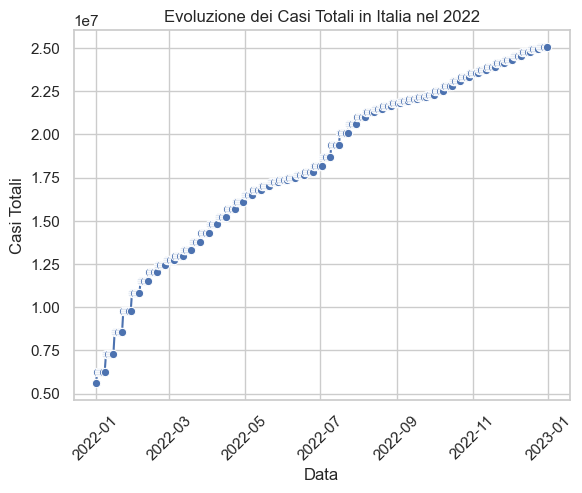

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assicuriamoci che la colonna 'date' sia in formato datetime
data['date'] = pd.to_datetime(data['date'])

# Filtro i dati per l'Italia nel 2022
italy_2022 = data[(data['location'] == "Italy") & (data['date'].dt.year == 2022)]

# Rimuovere eventuali valori nulli
italy_2022 = italy_2022.dropna(subset=['total_cases'])

# Grafico per mostrare l'evoluzione dei casi totali
sns.set(style="whitegrid")
sns.lineplot(data=italy_2022, x='date', y='total_cases', marker='o')

# Personalizzazioni  grafico
plt.title("Evoluzione dei Casi Totali in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.xticks(rotation=45)
plt.show()

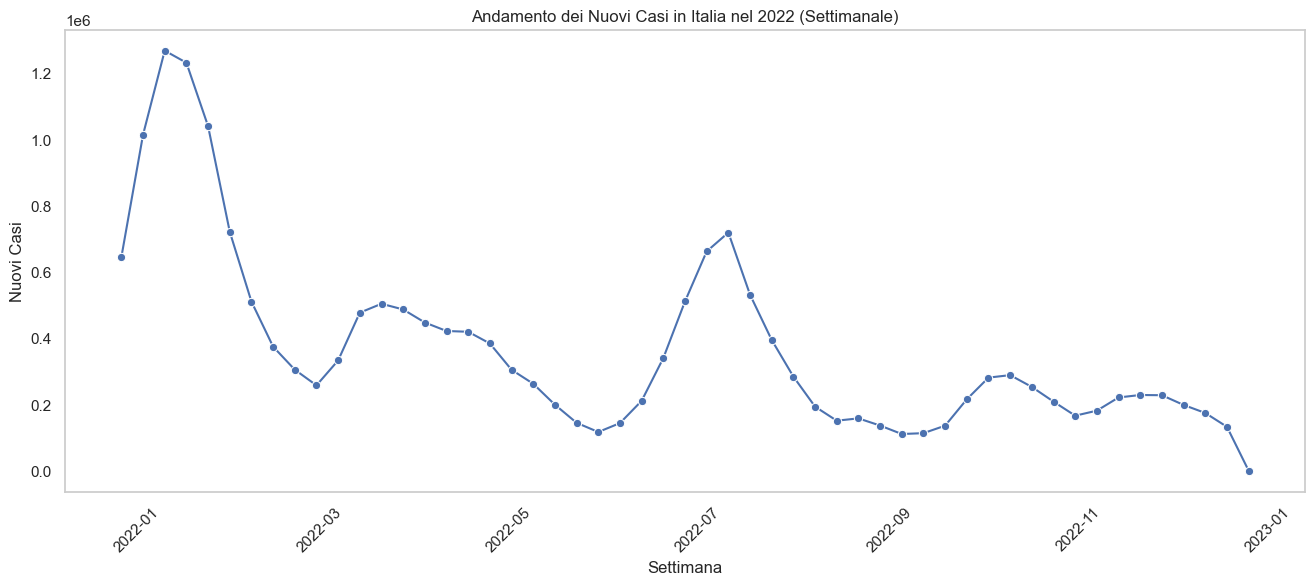

In [43]:
# Rimuovo valori nulli
italy_2022 = italy_2022.dropna(subset=['new_cases'])

# Raggruppo dati per settimana
italy_2022['week'] = italy_2022['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_data = italy_2022.groupby('week')['new_cases'].sum().reset_index()

# Creazione del grafico con Seaborn
plt.figure(figsize=(16, 6))
sns.lineplot(data=weekly_data, x='week', y='new_cases', marker='o')
plt.title("Andamento dei Nuovi Casi in Italia nel 2022 (Settimanale)")
plt.xlabel("Settimana")
plt.ylabel("Nuovi Casi")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [45]:
#Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo 
#il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) 
       # a. scrivere un breve commento a riguardo

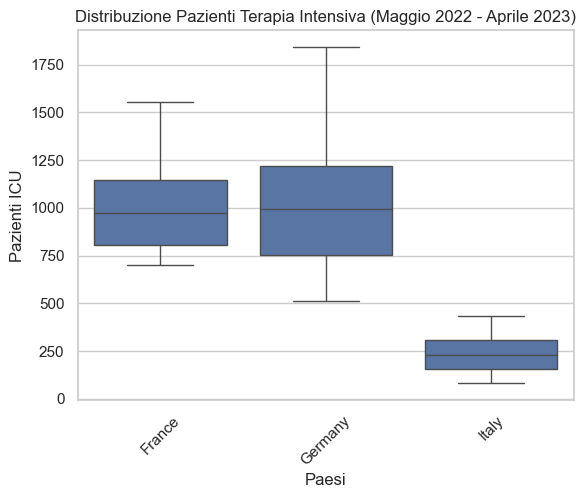

In [54]:
# Filtro per Italia, Germania e Francia da maggio 2022 adaprile 2023
locations = ['Italy', 'Germany', 'France']
period_data = data[
    (data['location'].isin(locations)) & 
    (data['date'] >= '2022-05-01') & 
    (data['date'] <= '2023-04-30')
]

# Rimozione delle righe senza dati ICU
period_data = period_data.dropna(subset=['icu_patients'])

# Creazione boxplot
sns.boxplot(data=period_data, x="location", y="icu_patients")

# Personalizzazioni del grafico
plt.title("Distribuzione Pazienti Terapia Intensiva (Maggio 2022 - Aprile 2023)")
plt.xlabel("Paesi")
plt.ylabel("Pazienti ICU")
plt.xticks(rotation=45)
plt.show()

In [52]:
# commento: 

In [53]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
 # a. mostrare la somma dei pazienti ospitalizzati per ognuna
 #b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [56]:
# Filtro per nazioni e per l'anno 2023
selected_countries = ['Italy', 'Germany', 'France', 'Spain']
data["date"] = pd.to_datetime(data["date"])
hospital_data_2023 = data[(data['location'].isin(selected_countries)) & (data['date'].dt.year == 2023)]

# Somma dei pazienti ospitalizzati per ciascuna nazione
total_hospitalized = hospital_data_2023.groupby('location')['hosp_patients'].sum()

# Verifica dei dati nulli
missing_data = hospital_data_2023['hosp_patients'].isna().sum()

# Risultati
print("Somma dei Pazienti Ospitalizzati per Nazione nel 2023:\n", total_hospitalized)
print("\nDati Mancanti per Pazienti Ospitalizzati nel 2023: ", missing_data)

Somma dei Pazienti Ospitalizzati per Nazione nel 2023:
 location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Dati Mancanti per Pazienti Ospitalizzati nel 2023:  843
